In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
path = "/content/drive/MyDrive/cars_engage_2022.xlsx"

In [ ]:
df = pd.read_excel(path)

In [ ]:
display(pd.DataFrame(df))
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# this is to view the all the columns and rows at the same time

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0.0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271.0,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272.0,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273.0,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274.0,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()
# we are analysing the mean std and other values for the column having float or int values

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [ ]:
df.isnull().sum()

Unnamed: 0                                      0
Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4


In [ ]:
print(df.keys())
# looking for all the columns so that unwanted columns can be removed

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)


In [ ]:
for col_name in df.columns: 
    print(col_name)
    #list representation of the same

Unnamed: 0
Make
Model
Variant
Ex-Showroom_Price
Displacement
Cylinders
Valves_Per_Cylinder
Drivetrain
Cylinder_Configuration
Emission_Norm
Engine_Location
Fuel_System
Fuel_Tank_Capacity
Fuel_Type
Height
Length
Width
Body_Type
Doors
City_Mileage
Highway_Mileage
ARAI_Certified_Mileage
ARAI_Certified_Mileage_for_CNG
Kerb_Weight
Gears
Ground_Clearance
Front_Brakes
Rear_Brakes
Front_Suspension
Rear_Suspension
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power_Steering
Power_Windows
Power_Seats
Keyless_Entry
Power
Torque
Odometer
Speedometer
Tachometer
Tripmeter
Seating_Capacity
Seats_Material
Type
Wheelbase
Wheels_Size
Start_/_Stop_Button
12v_Power_Outlet
Audiosystem
Aux-in_Compatibility
Average_Fuel_Consumption
Basic_Warranty
Bluetooth
Boot-lid_Opener
Boot_Space
CD_/_MP3_/_DVD_Player
Central_Locking
Child_Safety_Locks
Clock
Cup_Holders
Distance_to_Empty
Door_Pockets
Engine_Malfunction_Light
Extended_Warranty
FM_Radio
Fuel-lid_Opener
Fuel_Gauge
Handbrake
Instrument_Console
Low_Fu

In [ ]:
df.dtypes
# having a overview of the type of values of different parameters

Unnamed: 0                                   float64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3d599f590>,
      dtype=object)

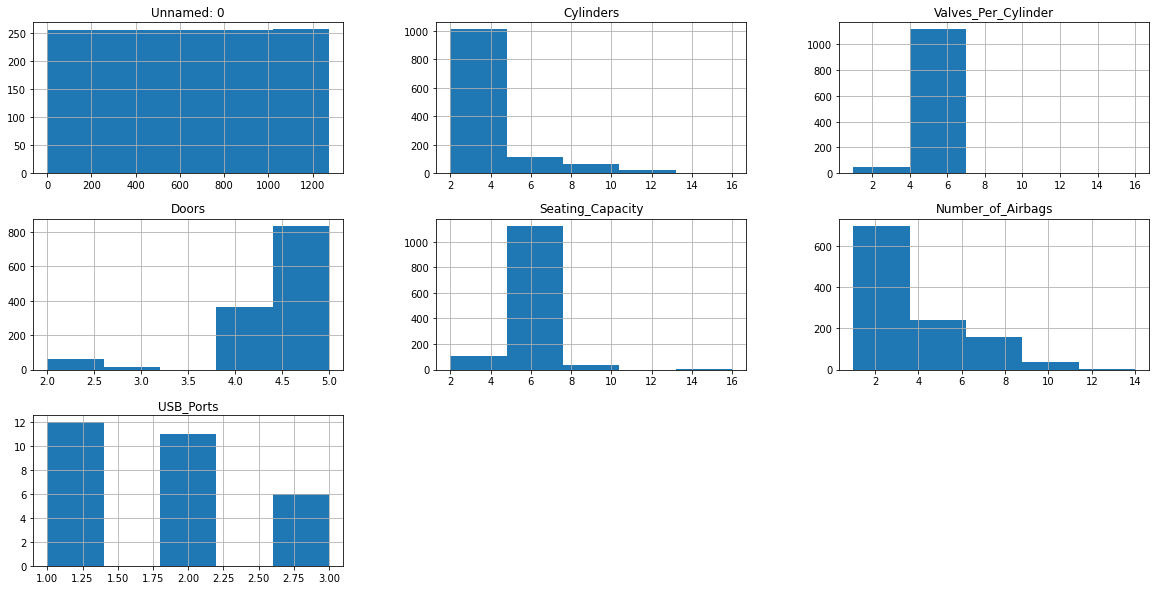

In [ ]:
df.hist(bins=5, figsize=(20,10))
# plotting histograms to have a view of the value till which a significant number of observations are there and removing the rest

In [ ]:
df['12v_Power_Outlet'].value_counts()

Yes    887
2.0    133
1.0     58
3.0     38
4.0      6
Name: 12v_Power_Outlet, dtype: int64

In [ ]:
df['Seating_Capacity'].value_counts()

5.0     915
7.0     183
4.0      70
2.0      39
6.0      26
9.0      19
8.0      17
16.0      1
Name: Seating_Capacity, dtype: int64

In [ ]:
df['Number_of_Airbags'].value_counts()

2.0     627
6.0     202
8.0      92
7.0      65
1.0      57
4.0      40
9.0      21
3.0      17
10.0     16
14.0      3
5.0       1
Name: Number_of_Airbags, dtype: int64

In [ ]:
df['Doors'].value_counts()

5.0    836
4.0    362
2.0     62
3.0     12
Name: Doors, dtype: int64

In [ ]:
df_subset = df[['Model','Seating_Capacity','Ex-Showroom_Price','Cylinders','Doors','Power','Length','Valves_Per_Cylinder','Variant','Average_Speed','ABS_(Anti-lock_Braking_System)','Fuel_Type','ARAI_Certified_Mileage','Number_of_Airbags']]
df_subset

,Model,Seating_Capacity,Ex-Showroom_Price,Cylinders,Doors,Power,Length,Valves_Per_Cylinder,Variant,Average_Speed,ABS_(Anti-lock_Braking_System),Fuel_Type,ARAI_Certified_Mileage,Number_of_Airbags
0,Nano Genx,4.0,"Rs. 2,92,667",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xt,NaN,NaN,Petrol,23.6 km/litre,NaN
1,Nano Genx,4.0,"Rs. 2,36,447",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xe,NaN,NaN,Petrol,23.6 km/litre,NaN
2,Nano Genx,4.0,"Rs. 2,96,661",2.0,4.0,38PS@5500rpm,3164 mm,2.0,Emax Xm,NaN,NaN,CNG,NaN,NaN
3,Nano Genx,4.0,"Rs. 3,34,768",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xta,NaN,NaN,Petrol,21.9 km/litre,NaN
4,Nano Genx,4.0,"Rs. 2,72,223",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xm,NaN,NaN,Petrol,23.6 km/litre,NaN
5,Nano Genx,4.0,"Rs. 3,14,815",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xma,NaN,NaN,Petrol,21.9 km/litre,NaN
6,Redi-Go,5.0,"Rs. 2,79,650",3.0,5.0,54PS@5678rpm,3429 mm,4.0,D,NaN,Yes,Petrol,25.17 km/litre,NaN
7,Redi-Go,5.0,"Rs. 3,51,832",3.0,5.0,54PS@5678rpm,3429 mm,4.0,T,NaN,NaN,Petrol,25.17 km/litre,NaN
8,Redi-Go,5.0,"Rs. 3,33,419",3.0,5.0,54PS@5678rpm,3429 mm,4.0,A,NaN,NaN,Petrol,25.17 km/litre,NaN
9,Redi-Go,5.0,"Rs. 3,62,000",3.0,5.0,54PS@5678rpm,3429 mm,4.0,S,NaN,NaN,Petrol,25.17 km/litre,NaN


In [ ]:
df_subset.isna().sum()
# missing values in the data set

Model                               0
Seating_Capacity                    6
Ex-Showroom_Price                   0
Cylinders                          66
Doors                               4
Power                               0
Length                              0
Valves_Per_Cylinder               102
Variant                             0
Average_Speed                     512
ABS_(Anti-lock_Braking_System)    132
Fuel_Type                           0
ARAI_Certified_Mileage            114
Number_of_Airbags                 135
dtype: int64

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model                           1276 non-null   object 
 1   Seating_Capacity                1270 non-null   float64
 2   Ex-Showroom_Price               1276 non-null   object 
 3   Cylinders                       1210 non-null   float64
 4   Doors                           1272 non-null   float64
 5   Power                           1276 non-null   object 
 6   Length                          1276 non-null   object 
 7   Valves_Per_Cylinder             1174 non-null   float64
 8   Variant                         1276 non-null   object 
 9   Average_Speed                   764 non-null    object 
 10  ABS_(Anti-lock_Braking_System)  1144 non-null   object 
 11  Fuel_Type                       1276 non-null   object 
 12  ARAI_Certified_Mileage          11

In [ ]:
df_subset['Seating_Capacity'] = df_subset['Seating_Capacity'].fillna(df_subset['Seating_Capacity'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Cylinders'] = df_subset['Cylinders'].fillna(df_subset['Cylinders'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Number_of_Airbags'] = df_subset['Number_of_Airbags'].fillna(df_subset['Number_of_Airbags'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Valves_Per_Cylinder'] = df_subset['Valves_Per_Cylinder'].fillna(df_subset['Valves_Per_Cylinder'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Average_Speed'].value_counts()

Yes    764
Name: Average_Speed, dtype: int64

In [ ]:
df['Variant'].value_counts()

Lxi                                       9
Vxi                                       9
Coupe                                     8
S                                         7
V8                                        6
Xe Diesel                                 6
V                                         5
Zxi                                       5
Xe Petrol                                 4
S Petrol                                  4
Vxi (O)                                   4
Xm Diesel                                 4
S Diesel                                  4
Ldi                                       4
Vx                                        4
Cooper S                                  4
G                                         4
Std                                       3
Xt Petrol                                 3
V Cvt                                     3
Xm Petrol                                 3
Sportback                                 3
Vxi Amt                         

In [ ]:
df['Model'].value_counts()

Nexon                                24
Kuv100 Nxt                           22
Compass                              21
Xuv500                               21
Amaze                                20
Creta                                18
Seltos                               16
Innova Crysta                        16
Ciaz                                 14
Swift                                14
Yaris                                14
Rapid                                14
Dzire                                14
Wagon                                14
Etios Liva                           14
Venue                                13
Verna                                13
Aspire                               13
Baleno                               13
Octavia                              12
Vento                                12
Elite I20                            12
Aura                                 12
Kwid                                 12
Ecosport                             12


In [ ]:
df['ARAI_Certified_Mileage'].value_counts()

23 km/litre           27
17.1 km/litre         24
16 km/litre           24
17.6 km/litre         23
23.1 km/litre         20
20 km/litre           19
15.4 km/litre         18
20.4 km/litre         17
23.59 km/litre        15
19.5 km/litre         14
18.15 km/litre        14
20.5 km/litre         14
16.3 km/litre         13
16.7 km/litre         13
19 km/litre           12
21.4 km/litre         12
23.97 km/litre        12
25.32 km/litre        11
17 km/litre           11
11.12 km/litre        11
20.1 km/litre         11
18.49 km/litre        10
20.7 km/litre         10
16.8 km/litre          9
18.19 km/litre         9
17.3 km/litre          9
20.45 km/litre         9
20.6 km/litre          9
24.3 km/litre          9
18 km/litre            9
21 km/litre            8
27.4 km/litre          8
7.8 km/litre           8
15 km/litre            8
15.29 km/litre         8
22 km/litre            8
28.4 km/litre          8
22.05 km/litre         8
25.17 km/litre         8
25.5 km/litre          8


In [ ]:
df_subset['Power'].value_counts()

83PS@6000rpm               52
75PS@4000rpm               37
90PS@4000rpm               29
100PS@3750RPM              28
68PS@6000rpm               25
100PS@3600rpm              23
86PS@6000rpm               19
90PS@6000rpm               19
155PS@3750rpm              19
68PS@5500rpm               18
68PS@5000rpm               17
173PS@3750rpm              16
110PS@4000rpm              15
68PS@3800rpm               15
107PS@6000rpm              14
96PS@6500rpm               13
105PS@5250rpm              12
123PS@6400rpm              12
103Bhp@6000rpm             12
110PS@3750RPM              12
110PS@5000rpm              12
82PS@5500RPM               11
77PS@3750RPM               11
120PS@4000RPM              11
119PS@6600rpm              11
85PS@3750rpm               10
67PS@5500rpm               10
140PS@3750rpm              10
128ps@4000rpm              10
80PS@5600rpm                9
83 Bhp@6000rpm              9
150PS@3400rpm               9
180PS@6200RPM               8
122PS@4000

In [ ]:
df_subset['Length'].value_counts()

3995 mm    174
4440 mm     36
3700 mm     29
4585 mm     29
4395 mm     27
3994 mm     27
4315 mm     25
3600 mm     20
4413 mm     18
4270 mm     18
4425 mm     17
3985 mm     16
4735 mm     16
4655 mm     15
3990 mm     14
3884 mm     14
3840 mm     14
4456 mm     14
3655 mm     14
4490 mm     14
3992 mm     13
3765 mm     13
3989 mm     13
4670 mm     12
3825 mm     12
4861 mm     12
4369 mm     12
3998 mm     12
3731 mm     12
4475 mm     10
4390 mm     10
3971 mm     10
3805 mm     10
4620 mm     10
3565 mm     10
4879 mm     10
4988 mm      9
3999 mm      9
3788 mm      9
3955 mm      8
4459 mm      8
3954 mm      8
3610 mm      8
3445 mm      8
4384 mm      8
4950 mm      7
5063 mm      7
4795 mm      7
4455 mm      7
5052 mm      7
4788 mm      7
3746 mm      7
4498 mm      7
3164 mm      6
3429 mm      6
4686 mm      6
4520 mm      6
3941 mm      6
4598 mm      6
4695 mm      6
4331 mm      6
4445 mm      6
3970 mm      6
3895 mm      6
5120 mm      6
4388 mm      6
3545 mm   

In [ ]:
df_subset['Average_Speed'] = df_subset['Average_Speed'].fillna('Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['ABS_(Anti-lock_Braking_System)'].value_counts()

Yes    1144
Name: ABS_(Anti-lock_Braking_System), dtype: int64

In [ ]:
df_subset['ABS_(Anti-lock_Braking_System)'] = df_subset['ABS_(Anti-lock_Braking_System)'].fillna('Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['ARAI_Certified_Mileage'].value_counts()

23 km/litre           27
17.1 km/litre         24
16 km/litre           24
17.6 km/litre         23
23.1 km/litre         20
20 km/litre           19
15.4 km/litre         18
20.4 km/litre         17
23.59 km/litre        15
19.5 km/litre         14
18.15 km/litre        14
20.5 km/litre         14
16.3 km/litre         13
16.7 km/litre         13
19 km/litre           12
21.4 km/litre         12
23.97 km/litre        12
25.32 km/litre        11
17 km/litre           11
11.12 km/litre        11
20.1 km/litre         11
18.49 km/litre        10
20.7 km/litre         10
16.8 km/litre          9
18.19 km/litre         9
17.3 km/litre          9
20.45 km/litre         9
20.6 km/litre          9
24.3 km/litre          9
18 km/litre            9
21 km/litre            8
27.4 km/litre          8
7.8 km/litre           8
15 km/litre            8
15.29 km/litre         8
22 km/litre            8
28.4 km/litre          8
22.05 km/litre         8
25.17 km/litre         8
25.5 km/litre          8


In [ ]:
df_subset['ARAI_Certified_Mileage'] = df_subset['ARAI_Certified_Mileage'].fillna('23 km/litre')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Doors'] = df_subset['Doors'].fillna('5.0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset.isnull().sum()

Model                             0
Seating_Capacity                  0
Ex-Showroom_Price                 0
Cylinders                         0
Doors                             0
Power                             0
Length                            0
Valves_Per_Cylinder               0
Variant                           0
Average_Speed                     0
ABS_(Anti-lock_Braking_System)    0
Fuel_Type                         0
ARAI_Certified_Mileage            0
Number_of_Airbags                 0
dtype: int64

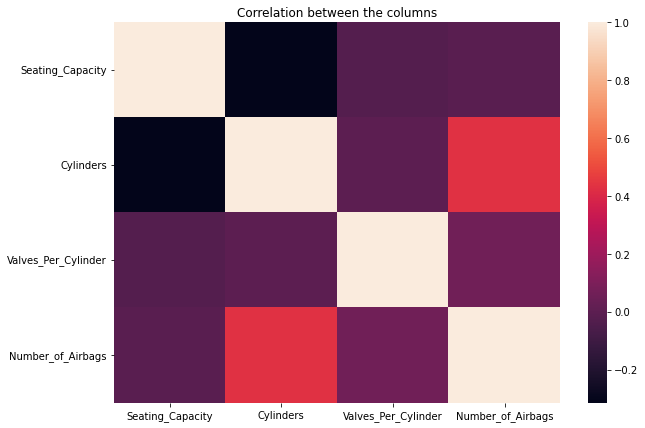

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_subset.corr(), annot=False)
plt.title('Correlation between the columns')
plt.show()

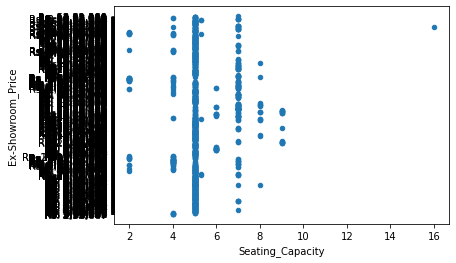

<Figure size 864x504 with 0 Axes>

In [ ]:
df_subset.plot(kind='scatter',x='Seating_Capacity',y='Ex-Showroom_Price')
fig=plt.figure(figsize=(12,7))
plt.show()

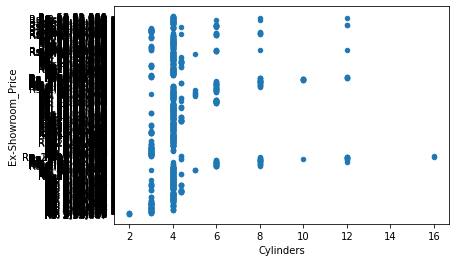

In [ ]:
df_subset.plot(kind='scatter',x='Cylinders',y='Ex-Showroom_Price')
plt.show()

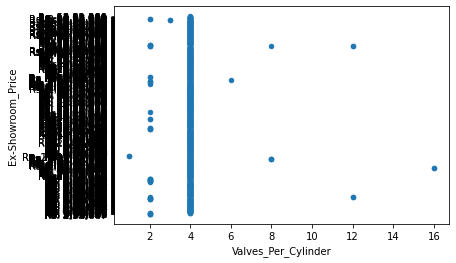

In [ ]:
df_subset.plot(kind='scatter',x='Valves_Per_Cylinder',y='Ex-Showroom_Price')
plt.show()

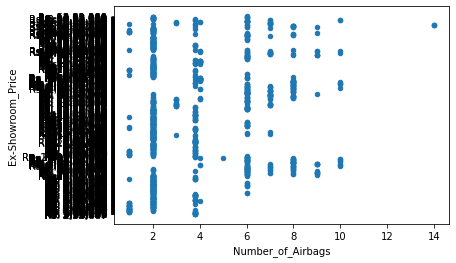

In [ ]:
df_subset.plot(kind='scatter',x='Number_of_Airbags',y='Ex-Showroom_Price')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_subset.Seating_Capacity,df_subset.Cylinders )

Text(0.5, 1.0, 'Test train split')

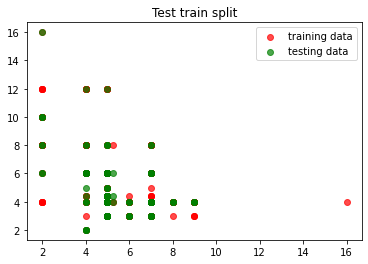

In [ ]:
plt.scatter(X_train,y_train, label='training data',color='r',alpha=.7)
plt.scatter(X_test,y_test, label='testing data',color='g',alpha=.7)
plt.legend()
plt.title('Test train split')

Text(0.5, 1.0, 'Test train split')

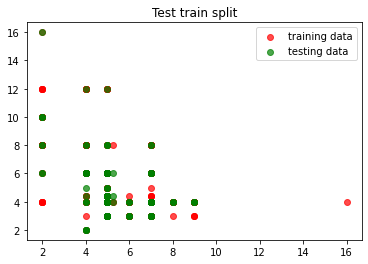

In [ ]:
plt.scatter(X_train,y_train, label='training data',color='r',alpha=.7)
plt.scatter(X_test,y_test, label='testing data',color='g',alpha=.7)
plt.legend()
plt.title('Test train split')

Text(0.5, 1.0, 'Test train split')

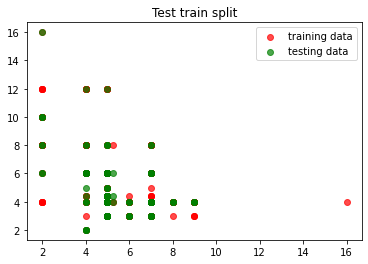

In [ ]:
plt.scatter(X_train,y_train, label='training data',color='r',alpha=.7)
plt.scatter(X_test,y_test, label='testing data',color='g',alpha=.7)
plt.legend()
plt.title('Test train split')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#now we will encode the data types with less uniqueness using OneHotEncoding
ohe = OneHotEncoder()

In [ ]:
print(ohe)

OneHotEncoder()


In [ ]:
ohe.fit_transform(df_subset[["Fuel_Type","ABS_(Anti-lock_Braking_System)","Average_Speed"]]).toarray()

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [ ]:
feature_arry = ohe.fit_transform(df_subset[["Fuel_Type","ABS_(Anti-lock_Braking_System)","Average_Speed"]]).toarray()

In [ ]:
print(feature_arry)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 1. 1.]]


In [ ]:
ohe.categories_

[array(['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
       dtype=object),
 array(['Yes'], dtype=object),
 array(['Yes'], dtype=object)]

In [ ]:
feature_labels = ohe.categories_

In [ ]:
np.array(feature_labels).ravel ()

array([array(['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
             dtype=object)                                                     ,
       array(['Yes'], dtype=object), array(['Yes'], dtype=object)],
      dtype=object)

In [ ]:
feature_labels = np.array(feature_labels).ravel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
print(feature_labels)

[array(['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
       dtype=object)
 array(['Yes'], dtype=object) array(['Yes'], dtype=object)]
